In [1]:
from python_environment_check import check_packages
d = {
    'numpy': '1.21.2',
    'matplotlib': '3.4.3',
    'sklearn': '1.0',
    'pandas': '1.3.2'
}
check_packages(d)

[OK] Your Python version is 3.10.9 (tags/v3.10.9:1dd9be6, Dec  6 2022, 20:01:21) [MSC v.1934 64 bit (AMD64)]
[OK] numpy 1.24.2
[OK] matplotlib 3.7.1
[OK] sklearn 1.2.2
[OK] pandas 1.5.3


In [2]:
from IPython.display import Image
%matplotlib inline

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import Data

Read from local csv

In [3]:
# Load the dataset
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Features V1, V2, … V28 are the principal components obtained with PCA.

The only features which have not been transformed with PCA are 'Time' and 'Amount'. 

Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.

Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. 

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Check for Missing Values

In [5]:
# manual implementation
feature_missing = []
for i in range(len(df.columns)):
    missing = 0
    for j in df[df.columns[i]]:
        if j == None: missing += 1
    feature_missing.append(missing)
        
print(feature_missing)

# # built in implementation
df.isnull().sum()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No expected missing or null data, check both manually and using pandas

### Partition Data

Split the data into 70-30 Training-Testing Sets, standardize features using StandardScaler so the values are scaled around 1 standard deviation of the mean

In [6]:
from collections import Counter

print(Counter(df.iloc[:, -1])) # class 1 = fraud

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = df.iloc[:, :-1].values, df.iloc[:, -1]

def partitionDF (X, y):
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.3, 
                         stratify=y,
                         random_state=0)

    sc = StandardScaler()
    X_train_std = sc.fit_transform(X_train)
    X_test_std = sc.transform(X_test)
    return X_train_std, X_test_std, y_train, y_test

X_train_std, X_test_std, y_train, y_test = partitionDF(X, y)

Counter({0: 284315, 1: 492})


### Dimensionality Reduction

Because there are an overwelming number of features/dimensions, we would normally want to reduce its size and select the most important features to improve runtime and performance. The problem with using eigenvalues or PCA is that Features V1, V2, … V28 are the result of PCA transformation and the amount of information/meaning between those features is equally spread out. This can be seen below:

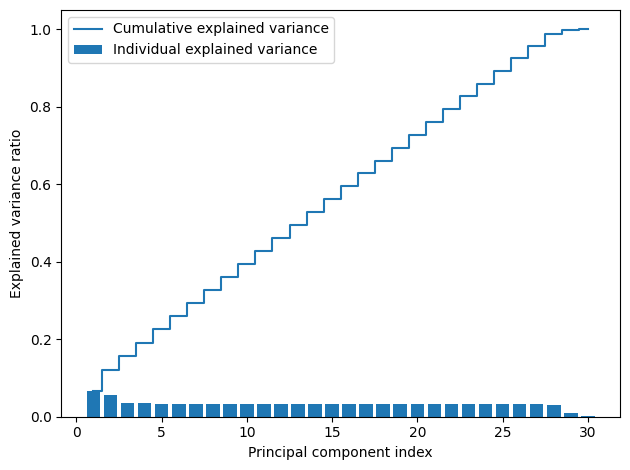

In [7]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, len(df.columns)), var_exp, align='center', label='Individual explained variance')
plt.step(range(1, len(df.columns)), cum_var_exp, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

Using RandomForest Feature Importance to determine most dominant columns

In [8]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=10, random_state=0, n_estimators=100, criterion="gini")
rf.fit(X_train_std, y_train)

importance = pd.DataFrame({
    'Feature': df.columns[:-1], 
    'Feature Importance': rf.feature_importances_
})

importance = importance.sort_values(by='Feature Importance', ascending=False)

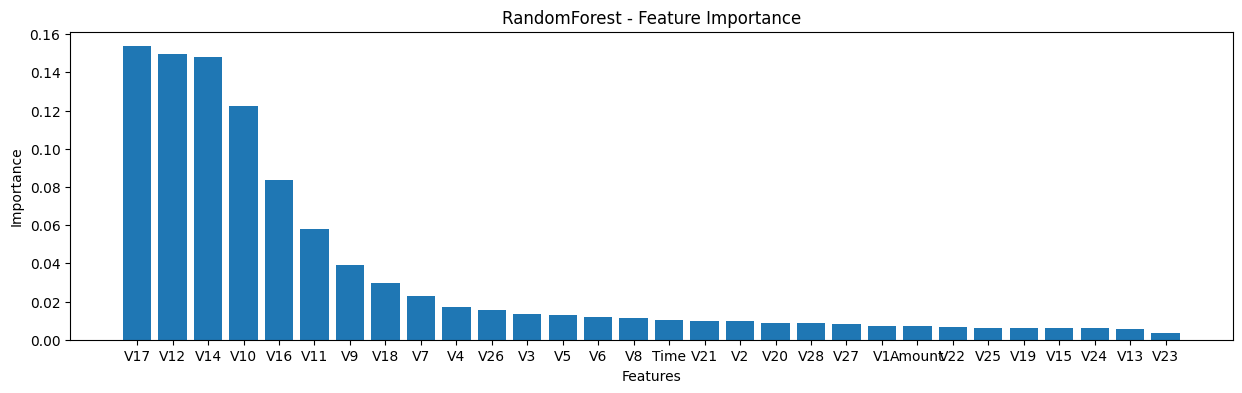

In [9]:
# Adding axes annotations
fig = plt.figure(figsize=(15,4))
plt.bar(importance['Feature'], importance['Feature Importance'], width=0.8)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('RandomForest - Feature Importance')
plt.show()

In [10]:
print('First 6 Features: ', end='')
print(importance['Feature Importance'][17] + importance['Feature Importance'][12] + importance['Feature Importance'][14] + importance['Feature Importance'][10] + importance['Feature Importance'][16] + importance['Feature Importance'][11])

First 6 Features: 0.7153106334905391


Based on RandomForest Feature Importance, should we take the first 6 features: V17, V12, V14, V10, V16, V11. We can retain above 70% of the information using only 1/4th of the features

### Partition/Scale Selected Features

Create a separate split with the selected features from above, compare accuracy and runtime results to all features

In [11]:
print('All Features:', len(df.iloc[:, :-1].values[0]))
X, y = df.iloc[:, :-1].values, df.iloc[:, -1]
X_train_std, X_test_std, y_train, y_test = partitionDF(X, y)

print('\nSelected Feature Values:', len(df[['V17', 'V12', 'V14', 'V10', 'V16', 'V11']].values[0]))
print(df[['V17', 'V12', 'V14', 'V10', 'V16', 'V11']].values)
X1, y1 = df[['V17', 'V12', 'V14', 'V10', 'V16', 'V11']].values, df['Class']
X1_train_std, X1_test_std, y1_train, y1_test = partitionDF(X1, y1)

All Features: 30

Selected Feature Values: 6
[[ 0.20797124 -0.61780086 -0.31116935  0.09079417 -0.47040053 -0.55159953]
 [-0.11480466  1.06523531 -0.1437723  -0.16697441  0.46391704  1.61272666]
 [ 1.10996938  0.06608369 -0.16594592  0.20764287 -2.89008319  0.62450146]
 ...
 [ 0.31350179  0.06311886 -0.51060184 -0.48478176  0.14071598  0.41161374]
 [ 0.50992846 -0.96288614  0.44962444 -0.39912565 -0.60857713 -1.93384882]
 [-0.66037665 -0.03151305 -0.08431647 -0.91542665 -0.30262009 -1.04045834]]


### Modeling 

For machine learning models, we will look to optimize Logistic Regression for model comparisons. Logistic regression is great for binary classification, in this case: whether the transaction was fraudulent or legitimate.

Additional models that might be of interest for exploration may be:

[Random Forest]: We utilized part of the random forest classifier for feature selection, overall this model is really powerful
    
[Support Vector Machines]: SVM is also a common classification model and might come in handy because we have pca feature values that are complicated and difficult to linearly separate
    
[Gradient Boosting]: A popular model that can handle a large dataset and provides high accuracy
    
[Neural Networks]: A complex model that can provide high accuracy

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import time

print('All Feature Train')

start = time.time()
lr = LogisticRegression(penalty='l2', multi_class='auto', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_std, y_train)
print(f'   Logistic Regression Train Time: {(time.time() - start):0.3f} seconds')

start = time.time()
svm = SVC(kernel='rbf', C=5.0, gamma=0.02, random_state=1)
svm = svm.fit(X_train_std, y_train)
print(f'   Suppor Vector Machine Train Time: {(time.time() - start):0.3f} seconds')

start = time.time()
forest = RandomForestClassifier(n_estimators=5, random_state=1, n_jobs=2)
forest = forest.fit(X_train_std, y_train)
print(f'   Random Forest Train Time: {(time.time() - start):0.3f} seconds')


print('\nSelected Feature Train')

start = time.time()
lr1 = LogisticRegression(penalty='l1', multi_class='auto', random_state=1, solver='liblinear')
lr1 = lr1.fit(X1_train_std, y1_train)
print(f'   Logistic Regression Train Time: {(time.time() - start):0.3f} seconds')

start = time.time()
svm1 = SVC(kernel='rbf', C=5.0, gamma=0.02, random_state=1)
svm1 = svm1.fit(X1_train_std, y1_train)
print(f'   Suppor Vector Machine Train Time: {(time.time() - start):0.3f} seconds')

start = time.time()
forest1 = RandomForestClassifier(n_estimators=5, random_state=1, n_jobs=2)
forest1 = forest1.fit(X1_train_std, y1_train)
print(f'   Random Forest Train Time: {(time.time() - start):0.3f} seconds')

All Feature Train
   Logistic Regression Train Time: 0.646 seconds
   Suppor Vector Machine Train Time: 75.380 seconds
   Random Forest Train Time: 4.765 seconds

Selected Feature Train
   Logistic Regression Train Time: 0.247 seconds
   Suppor Vector Machine Train Time: 190.861 seconds
   Random Forest Train Time: 1.907 seconds


From the results above, we can show the runtime performance between the all the features and the selected features:
    
    Logistic Regression: 61.76% decrease in runtime
   
    Support Vector Machine: 153.19% increase in runtime
   
    Random Forest: 59.98% decrease in runtime

Both Logistic Regression and Random Forest improved in runtime with the selected feature split, inversely SVM increased in runtime due to fewer features because the training algorithm computes the distance betweeen each data point and decision boundary- with the fewer features, the distance calculation requires more time and resource, slowing down the training process

### Testing

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [13]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

def getAUC(model, X_test, y_test):
    predict = model.predict(X_test)

    precision, recall, _= precision_recall_curve(y_test, predict)
    area = auc(recall, precision)

    return area

from sklearn.metrics import accuracy_score

def getACC(model, x_testing, y_testing):
    predict = model.predict(x_testing)
    
    miss = int((y_testing != predict).sum())
    accuracy = accuracy_score(y_testing, predict)
    
    return miss, accuracy

def testModel(model, x_testing, y_testing):
    area = getAUC(model, x_testing, y_testing)
    miss, accuracy = getACC(model, x_testing, y_testing)
    print(f'\t     Area: {area:0.6f}\n\t     Miss: {miss}/{len(y_test)}\n\t Accuracy: {accuracy:0.6f}')

In [14]:
print(f'All Feature Test')

print('   Logistic Regression:')
start = time.time()
testModel(lr, X_test_std, y_test)
print(f'\tTest Time: {(time.time() - start):0.3f} seconds')

start = time.time()
print('\n   SVM:')
testModel(svm, X_test_std, y_test)
print(f'\tTrain Time: {(time.time() - start):0.3f} seconds')

start = time.time()
print('\n   Random Forest:')
testModel(forest, X_test_std, y_test)
print(f'\tTrain Time: {(time.time() - start):0.3f} seconds')

print(f'\nSelected Feature Test')

print('   Logistic Regression:')
start = time.time()
testModel(lr1, X1_test_std, y1_test)
print(f'\tTest Time: {(time.time() - start):0.3f} seconds')

start = time.time()
print('\n   SVM:')
testModel(svm1, X1_test_std, y1_test)
print(f'\tTrain Time: {(time.time() - start):0.3f} seconds')

start = time.time()
print('\n   Random Forest:')
testModel(forest1, X1_test_std, y1_test)
print(f'\tTrain Time: {(time.time() - start):0.3f} seconds')

All Feature Test
   Logistic Regression:
	     Area: 0.753190
	     Miss: 68/85443
	 Accuracy: 0.999204
	Test Time: 0.018 seconds

   SVM:
	     Area: 0.857097
	     Miss: 42/85443
	 Accuracy: 0.999508
	Train Time: 19.411 seconds

   Random Forest:
	     Area: 0.824336
	     Miss: 50/85443
	 Accuracy: 0.999415
	Train Time: 0.053 seconds

Selected Feature Test
   Logistic Regression:
	     Area: 0.700357
	     Miss: 81/85443
	 Accuracy: 0.999052
	Test Time: 0.008 seconds

   SVM:
	     Area: 0.835178
	     Miss: 47/85443
	 Accuracy: 0.999450
	Train Time: 3.485 seconds

   Random Forest:
	     Area: 0.824336
	     Miss: 50/85443
	 Accuracy: 0.999415
	Train Time: 0.048 seconds


From the model testing results above, we can see that:

    Logistic Regression had a 7.015% decrease in AUC and 13 more missclassifications for the trade off of 0.10 seconds (~50% of the runtime) between all of the features and the selected features
    
    SVM had a 2.557% decrease in AUC and 5 more missclassifications for the trade off of 15.331 seconds (19% of the run time) between all of the features and the selected features
    
    Random Forest had the same performance for AUC and accuracy with the improvement of 0.08 seconds between all of the features and the selected features

For the models we learned in the course (Logistic Regression, SVM, and Random Forest), we can see that both SVM and Random Forest were comparible in terms of AUPRC and Accuracy Results. SVM had the best performance for the highest amount of resources (features and runtime) while Random Forest was a close in AUPRC and Accuracy with much better runtime even with only the selected features.


### Additional Models

In additional to the models we learned in the course, I would like to test the capabilities of gradient boosting and neural network, these features will require more resources than our other models and push for the best accuracy. When working with financial transactions, it would be much better to maximize the true positive and minimize the false positives to avoid disabling someones payment method on a missclassification.

#### Gradient Boosting

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

print('All Feature Train')

start = time.time()
gb = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_depth=10, random_state=1)
gb = gb.fit(X_train_std, y_train)
print(f'   Gradient Boosting Train Time: {(time.time() - start):0.3f} seconds')

print('\nSelected Feature Train')

start = time.time()
gb1 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_depth=10, random_state=1)
gb1 = gb1.fit(X1_train_std, y1_train)
print(f'   Gradient Boosting Train Time: {(time.time() - start):0.3f} seconds')

All Feature Train
   Gradient Boosting Train Time: 192.863 seconds

Selected Feature Train
   Gradient Boosting Train Time: 39.179 seconds


In [39]:
print(f'All Feature Test')

print('   Gradient Boosting:')
start = time.time()
testModel(gb, X_test_std, y_test)
print(f'\tTest Time: {(time.time() - start):0.3f} seconds')

print(f'\nSelected Feature Test')

print('   Gradient Boosting:')
start = time.time()
testModel(gb1, X1_test_std, y1_test)
print(f'\tTest Time: {(time.time() - start):0.3f} seconds')

All Feature Test
   Gradient Boosting:
	     Area: 0.788511
	     Miss: 60/85443
	 Accuracy: 0.999298
	Test Time: 0.093 seconds

Selected Feature Test
   Gradient Boosting:
	     Area: 0.747700
	     Miss: 75/85443
	 Accuracy: 0.999122
	Test Time: 0.097 seconds


Here for the Gradient Boosting classifier, I examined the parameters for n_estimator, learning_rate and max_depth to maximize area and minimize misscalculation. 

The n estimators performed worse at higher n, n at 100 or 200 performed 3x worse, especially with selected features

The learning rate at 0.1 was best fitted as a lower learning rate did not give it enough variance to escape local minimums and produced higher miss classifications.

The max depth performed best around 10 depth with fall off performance at 5 and 15

A big take away from all of the hyperparameter comparisons is that- because Gradient Boosting is a more complicated model, we can definitely see the runtime for training scale much higher while its runtime for testing is relatively swift

#### Neural Network - Multi-Layered Perceptron

In [69]:
from sklearn.neural_network import MLPClassifier

print('All Feature Train')

start = time.time()
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5), max_iter=100)
nn = nn.fit(X_train_std, y_train)
print(f'   NNMLP Train Time: {(time.time() - start):0.3f} seconds')

print('\nSelected Feature Train')

start = time.time()
nn1 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5), max_iter=100)
nn1 = nn1.fit(X1_train_std, y1_train)
print(f'   NNMLP Train Time: {(time.time() - start):0.3f} seconds')

All Feature Train
   NNMLP Train Time: 2.056 seconds

Selected Feature Train
   NNMLP Train Time: 2.447 seconds


In [70]:
print(f'All Feature Test')

print('   NNMLP:')
start = time.time()
testModel(nn, X_test_std, y_test)
print(f'\tTest Time: {(time.time() - start):0.3f} seconds')

print(f'\nSelected Feature Test')

print('   NNMLP:')
start = time.time()
testModel(nn1, X1_test_std, y1_test)
print(f'\tTest Time: {(time.time() - start):0.3f} seconds')

All Feature Test
   NNMLP:
	     Area: 0.835831
	     Miss: 47/85443
	 Accuracy: 0.999450
	Test Time: 0.030 seconds

Selected Feature Test
   NNMLP:
	     Area: 0.789726
	     Miss: 59/85443
	 Accuracy: 0.999309
	Test Time: 0.018 seconds


The Multi-layered Perceptron Neural Network Model was incredibly surprising, the model was super fast in training and testing while producing really good AUPRC Area and Low Missclassification in the all feature test. A downside of this model is that the results of the tests are a bit volatile, reruns of the same code could change the performance by 3-7 missclassifications.

### Results

For model testing, the author of the credit card fraud detection data recommended using AUPRC because the confusion matrix accuracy is not meaningful for unbalanced classification. In addition we wanted to highlight the accuracy and missclassification of the models as false possitives could have large consequences in the real world.

Overall, each model hyperparameter was selected to optimize the area and accuracy. The hyperparameters were kept the same across the same model to measure accuracy vs runtime between the full feature and selected feature splits.

Based on our testings above, SVM and Neural Network models had the highest AUPRC and lowest missclassifications on the full features, and the Neural Network model blitzed SVM runtime in both training and testing.

In the selected feature testing, Random Forest performed the best and was able to capitalize on the runtime improvements while maintaining the good AUPRC and accuracy. Part of the Random Forest performing consistently especially in the selected feature test could be correlated with using the Random Forest Classifier during the important feature selection earlier.